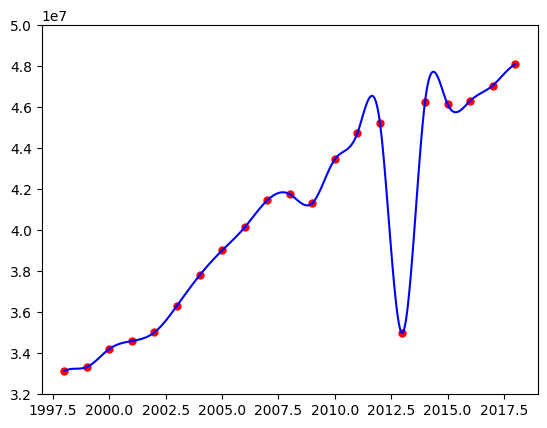

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fx(x, f0, f1, x0, x1, y0, y1):
    return f0 * ((x - x0) ** 2) / 2 - f0 * ((x - x0) ** 3) / 6 + f1 * ((x - x0) ** 3) / 6 + \
           (y1 - y0) * (x - x0) - f0 * (x - x0) / 3 - f1 * (x - x0) / 6 + y0  # Funkcija

x = np.array(list(range(1998, 2019)))  # Metai
y = np.array([33134921, 33329417, 34208319, 34593446, 35018764, 36315562,
                  37789694, 39003678, 40128915, 41442032, 41744913, 41308022,
                  43442887, 44714896, 45230398, 35000000, 46235969, 46135596,
                  46288080, 47035210, 48069813])

#45922200

plt.xlim([1997, 2019])
plt.ylim([32000000, 50000000])

for i in range(0, 21):
    plt.plot(x[i], y[i], markersize=5, marker='o', color='red')

mat = np.matrix(np.zeros([21, 21]))

for i in range(0, 19):
    mat[i, i] = 1 / 6
    mat[i, i + 1] = 2 / 3
    mat[i, i + 2] = 1 / 6

mat[19, 0] = 1 / 3
mat[19, 1] = 1 / 6
mat[19, 19] = 1 / 6
mat[19, 20] = 1 / 3
mat[20, 0] = 1
mat[20, 20] = -1

b = np.matrix(np.zeros([21, 1]))

for i in range(0, 19):
    b[i, 0] = (y[i + 2] - y[i + 1]) - (y[i + 1] - y[i])

b[19, 0] = (y[1] - y[0]) - (y[20] - y[19])

ans = np.linalg.solve(mat, b)
#print(ans)

for i in range(0, 20):
    xPlot = np.linspace(x[i], x[i + 1])
    yPlot = np.asarray(fx(xPlot, ans[i], ans[i + 1], x[i], x[i + 1], y[i], y[i + 1]))
    plt.plot(xPlot, yPlot[0], color='blue')

plt.show()
